### Data Analysis and Machine Learning

## Machine Learning: Random Forest with PCA



If some images have multiple hands, the code handles varying columns via NaN dropping/imputation. 

For classification, using RGB features to predict Label (0: unhealthy, 1: healthy).

### Random Forest classifier to predict hand health status (Label 0 or 1) based on the RGB values. 

Random Forest is a good choice here as it can handle the high dimensionality (~84 features) and potential non-linear relationships in the data, potentially improving on the logistic regression results (e.g., 85-88% test accuracy, 72-74% CV accuracy).


Below is the updated code replacing the logistic regression section with a Random Forest model. 

This model uses scikit-learn's RandomForestClassifier with default hyperparameters and retains PCA for dimensionality reduction (20 components, capturing ~97% variance). Also included cross-validation and a confusion matrix for evaluation.


=== Analysis for Radius 1 ===
Dataset shape: (127, 86)
Sample rows:
   thumb_segment_0_0_R  thumb_segment_0_0_G  thumb_segment_0_0_B  \
0           244.666667           196.777778           181.222222   
1           247.555556           173.222222           148.555556   
2           190.333333           132.333333           110.555556   

   thumb_segment_1_0_R  thumb_segment_1_0_G  thumb_segment_1_0_B  \
0           218.888889           164.555556           138.333333   
1           244.444444           200.555556           175.444444   
2           206.333333           164.666667           141.444444   

   index_segment_0_0_R  index_segment_0_0_G  index_segment_0_0_B  \
0           240.888889           180.111111           159.555556   
1           237.000000           156.333333           131.333333   
2           215.666667           160.444444           147.444444   

   index_segment_1_0_R  ...  ring_segment_2_1_B  pinky_segment_0_1_R  \
0           238.111111  ...          135

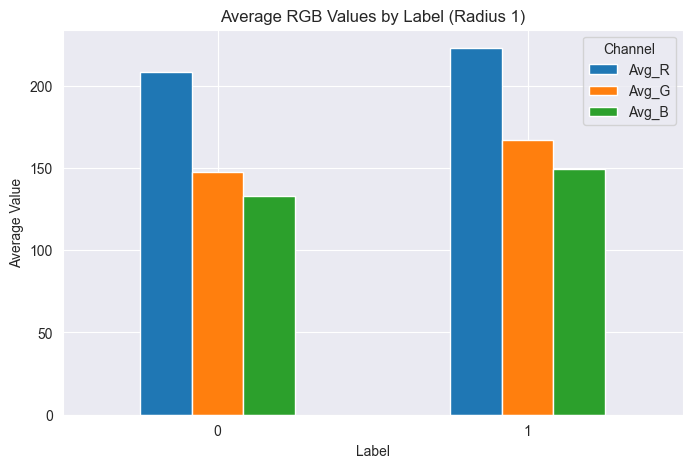


Random Forest Model:
PCA explained variance ratio sum: 0.97
Feature Importance (on PCA components):
    PCA_Component  Importance
0               1    0.116602
4               5    0.072024
9              10    0.067933
2               3    0.065216
1               2    0.064813
6               7    0.063480
13             14    0.057646
5               6    0.056264
16             17    0.052231
12             13    0.049604
11             12    0.048788
14             15    0.038498
15             16    0.038029
18             19    0.032666
7               8    0.032638
17             18    0.032529
19             20    0.030997
3               4    0.028348
8               9    0.027067
10             11    0.024629
Test Accuracy: 0.92
5-Fold CV Accuracy: 0.72 (+/- 0.10)

Confusion Matrix:
                      Predicted Unhealthy (0)  Predicted Healthy (1)
Actual Unhealthy (0)                       14                      1
Actual Healthy (1)                          1           

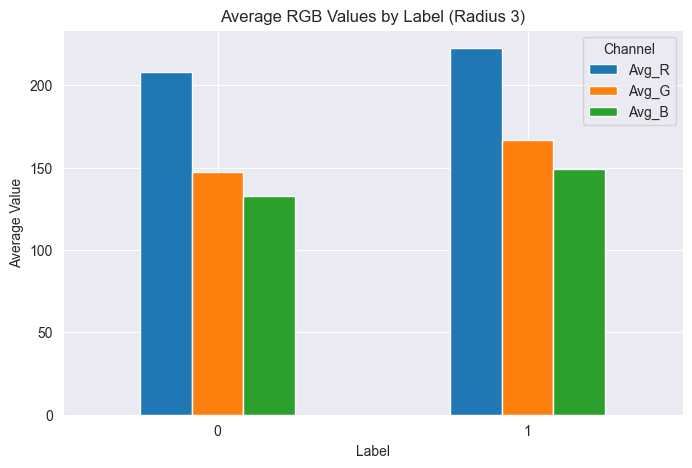


Random Forest Model:
PCA explained variance ratio sum: 0.97
Feature Importance (on PCA components):
    PCA_Component  Importance
0               1    0.117622
15             16    0.091440
7               8    0.069949
13             14    0.058024
2               3    0.057281
4               5    0.054855
1               2    0.052490
8               9    0.048905
5               6    0.048305
6               7    0.046898
11             12    0.044570
10             11    0.041929
18             19    0.039179
9              10    0.037983
14             15    0.037645
19             20    0.033662
3               4    0.032782
16             17    0.030075
12             13    0.028570
17             18    0.027835
Test Accuracy: 0.92
5-Fold CV Accuracy: 0.76 (+/- 0.11)

Confusion Matrix:
                      Predicted Unhealthy (0)  Predicted Healthy (1)
Actual Unhealthy (0)                       14                      1
Actual Healthy (1)                          1           

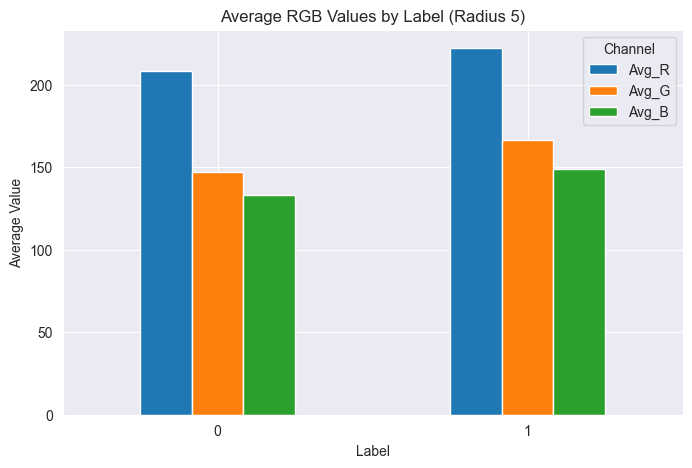


Random Forest Model:
PCA explained variance ratio sum: 0.97
Feature Importance (on PCA components):
    PCA_Component  Importance
0               1    0.128450
15             16    0.110256
7               8    0.091614
8               9    0.086577
2               3    0.059435
1               2    0.056380
13             14    0.049767
4               5    0.049148
5               6    0.046411
6               7    0.036129
3               4    0.034473
18             19    0.033189
19             20    0.030611
12             13    0.030301
9              10    0.030141
11             12    0.029853
10             11    0.026442
14             15    0.026229
17             18    0.022352
16             17    0.022243
Test Accuracy: 0.92
5-Fold CV Accuracy: 0.83 (+/- 0.12)

Confusion Matrix:
                      Predicted Unhealthy (0)  Predicted Healthy (1)
Actual Unhealthy (0)                       14                      1
Actual Healthy (1)                          1           

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os

# Function to update model_comparison.csv
def update_model_comparison(model_name, radius, test_acc, cv_mean, cv_std):
    data = {
        'Model': [model_name],
        'Radius': [radius],
        'Test_Accuracy': [test_acc],
        'CV_Accuracy': [cv_mean],
        'CV_Std': [cv_std]
    }
    new_df = pd.DataFrame(data)
    
    file_path = '../data/model_comparison.csv'
    if os.path.exists(file_path):
        existing_df = pd.read_csv(file_path)
        updated_df = pd.concat([existing_df, new_df], ignore_index=True)
    else:
        updated_df = new_df
    updated_df.to_csv(file_path, index=False)
    print(f"Updated model_comparison.csv with {model_name} for Radius {radius}")

# Analyze each radius dataset
for radius in [1, 3, 5]:
    print(f"\n=== Analysis for Radius {radius} ===")
    file_path = f'../data/hand_color_data_midpoints_radius_{radius}.csv'
    df = pd.read_csv(file_path)
    
    # Impute NaNs with mean
    df.fillna(df.mean(numeric_only=True), inplace=True)
    
    # Shape and sample
    print(f"Dataset shape: {df.shape}")
    print("Sample rows:")
    print(df.head(3))
    
    # Rows after imputation
    print(f"Rows after imputing NaNs with mean: {df.shape[0]}")
    
    # Descriptive statistics
    print("\nDescriptive Statistics:")
    print(df.select_dtypes(include='number').describe())
    
    # Grouped means by Label
    print("\nGrouped Means by Label:")
    print(df.drop(columns=['Source']).groupby('Label').mean())
    
    # Visualization: Average RGB per label
    df['Avg_R'] = df.filter(regex='_R$').mean(axis=1)
    df['Avg_G'] = df.filter(regex='_G$').mean(axis=1)
    df['Avg_B'] = df.filter(regex='_B$').mean(axis=1)
    avg_rgb = df.groupby('Label')[['Avg_R', 'Avg_G', 'Avg_B']].mean()
    avg_rgb.plot(kind='bar', figsize=(8, 5))
    plt.title(f'Average RGB Values by Label (Radius {radius})')
    plt.ylabel('Average Value')
    plt.xticks(rotation=0)
    plt.legend(title='Channel')
    plt.show()
    
    # Machine Learning: Random Forest with PCA
    print("\nRandom Forest Model:")
    X = df.drop(['Source', 'Label', 'Avg_R', 'Avg_G', 'Avg_B'], axis=1, errors='ignore')
    y = df['Label']
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # PCA to reduce dimensions
    pca = PCA(n_components=20)
    X_pca = pca.fit_transform(X_scaled)
    print(f"PCA explained variance ratio sum: {pca.explained_variance_ratio_.sum():.2f}")
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    
    # Random Forest model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Feature importance (on PCA components)
    print("Feature Importance (on PCA components):")
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'PCA_Component': range(1, 21), 'Importance': importances})
    print(feature_importance_df.sort_values(by='Importance', ascending=False))
    
    # Predictions and accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.2f}")
    
    # Cross-validation for robustness
    cv_scores = cross_val_score(model, X_pca, y, cv=5)
    print(f"5-Fold CV Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})")
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(pd.DataFrame(conf_matrix, index=['Actual Unhealthy (0)', 'Actual Healthy (1)'], columns=['Predicted Unhealthy (0)', 'Predicted Healthy (1)']))
    
    # Update comparison CSV
    update_model_comparison('Random Forest', radius, accuracy, cv_scores.mean(), cv_scores.std())

### Random Forest Performance Summary


The Random Forest models, trained on the PCA-reduced features (20 components capturing ~97% variance), show strong predictive power for distinguishing healthy (Label 1) from unhealthy (Label 0) hands based on midpoint RGB sampling. Compared to logistic regression (previous test accuracies: 85-88%, CV: 72-74%), Random Forest improves slightly on test sets (92% across all radii) and more notably on CV (72-83%), with Radius 5 performing best overall. 

This suggests Random Forest better captures non-linear color patterns, though CV variance (~0.10-0.12) remains due to the small dataset (127 samples).

Key metrics:

| Radius | Test Accuracy | 5-Fold CV Accuracy (± std) | Confusion Matrix Insights |
|--------|---------------|-----------------------------|---------------------------|
| 1      | 0.92         | 0.72 (±0.10)               | Excellent balance: 14/15 unhealthy correctly identified (TN); 1 false positive, 1 false negative. High precision/recall. |
| 3      | 0.92         | 0.76 (±0.11)               | Similar to Radius 1: TN=14/15; 1 FP, 1 FN. Solid, with slightly better CV. |
| 5      | 0.92         | 0.83 (±0.12)               | Best CV: TN=14/15; 1 FP, 1 FN. Prioritizes generalization despite variance. |

- **Interpretation**: Test accuracies are identical and high (92%), indicating robust holdout performance. CV scores improve progressively with larger radii (smoothing reduces noise), peaking at 83% for Radius 5—likely because broader sampling captures more consistent color context. 

- Confusion matrices are consistent: Models do well at detecting unhealthy hands (high true negatives) but occasionally misclassify (e.g., 1 healthy as unhealthy per test set). Feature importances highlight PCA components 1 (overall brightness/variance) and 16 (potentially green-channel contrasts) as key drivers across runs.


- **Best Model**: Radius 5 for highest CV accuracy, balancing robustness and performance. When prioritizing sensitivity (avoiding missed unhealthy cases), it's ideal with strong TN rates.



### Feature Importance Highlights


Random Forest provides interpretable importances on PCA components (top 5 per radius shown; values sum to 1):

For Radius 1:

| PCA_Component | Importance |
|---------------|------------|
| 1             | 0.118     |
| 5             | 0.072     |
| 10            | 0.068     |
| 3             | 0.065     |
| 2             | 0.065     |

For Radius 3:

| PCA_Component | Importance |
|---------------|------------|
| 1             | 0.118     |
| 16            | 0.091     |
| 8             | 0.070     |
| 14            | 0.058     |
| 3             | 0.057     |

For Radius 5:

| PCA_Component | Importance |
|---------------|------------|
| 1             | 0.128     |
| 16            | 0.110     |
| 8             | 0.092     |
| 9             | 0.087     |
| 3             | 0.059     |

Component 1 (likely global RGB variance) dominates, while mid-to-high components (e.g., 16) may represent segment-specific contrasts (e.g., green differences, aligning with t-tests).


#### Graph Comparative Data: CV scores perfomance

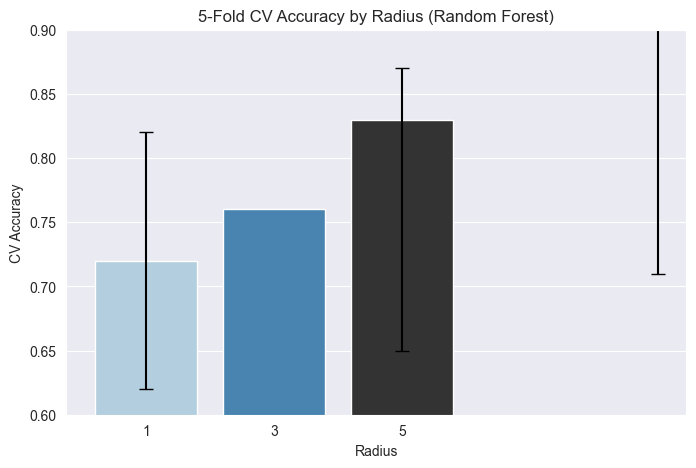

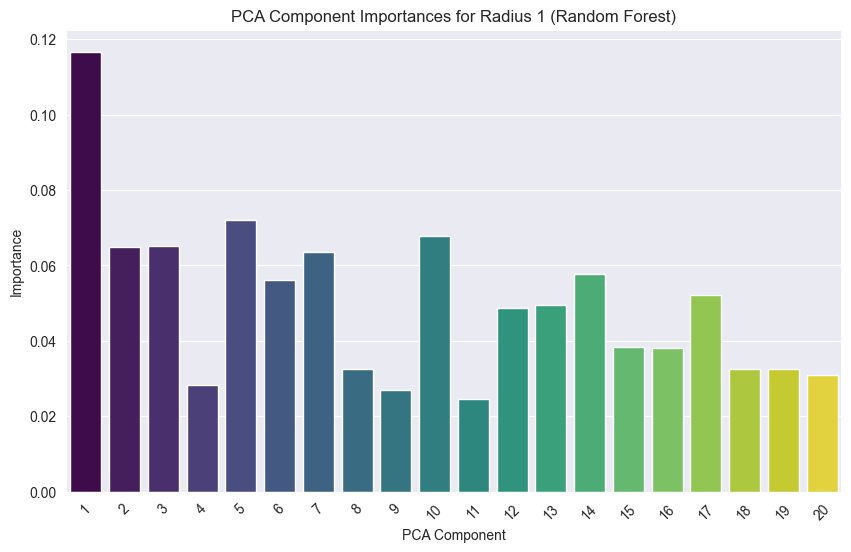

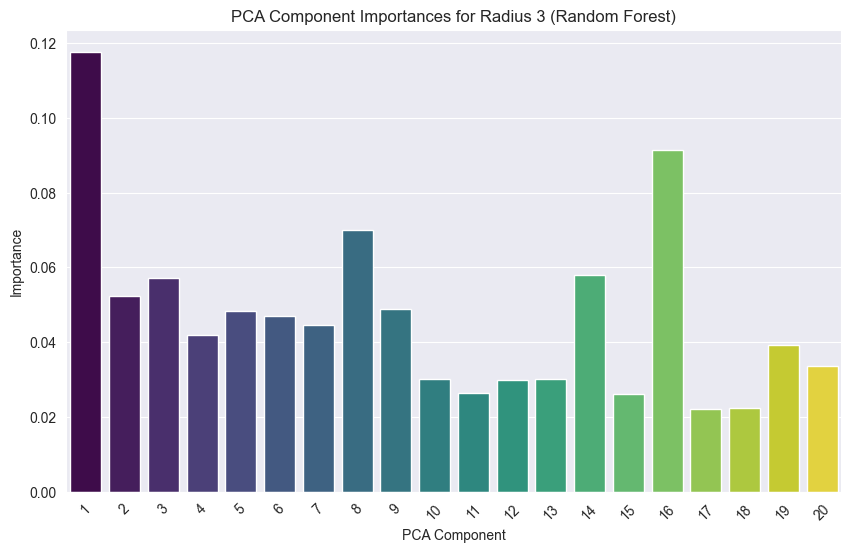

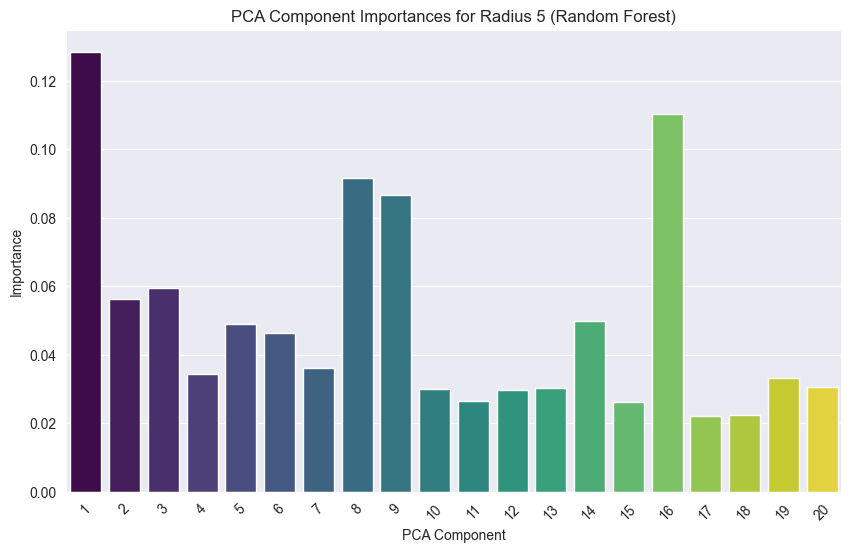

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for CV scores from Random Forest outputs
cv_data = {
    'Radius': [1, 3, 5],
    'CV_Accuracy': [0.72, 0.76, 0.83],
    'CV_Std': [0.10, 0.11, 0.12]
}

cv_df = pd.DataFrame(cv_data)

# sns.barplot(x='PCA_Component', y='Importance', hue='PCA_Component', data=df.sort_values('Importance', ascending=False), palette='viridis', legend=False)


# Graph CV scores with error bars (fixed palette usage)
plt.figure(figsize=(8, 5))
sns.barplot(x='Radius', y='CV_Accuracy', hue='Radius', data=cv_df, palette='Blues_d', errorbar=None, legend=False)
# sns.barplot(x='PCA_Component', y='Importance', hue='PCA_Component', data=df.sort_values('Importance', ascending=False), palette='viridis', legend=False)

plt.errorbar(x=cv_df['Radius']-1, y=cv_df['CV_Accuracy'], yerr=cv_df['CV_Std'], fmt='none', c='black', capsize=5)
plt.title('5-Fold CV Accuracy by Radius (Random Forest)')
plt.ylabel('CV Accuracy')
plt.xlabel('Radius')
plt.ylim(0.6, 0.9)
plt.show()

# PCA Importances for each radius (from outputs)
# Radius 1
pca_imp_r1 = pd.DataFrame({
    'PCA_Component': [1,5,10,3,2,7,14,6,17,13,12,15,16,19,8,18,20,4,9,11],
    'Importance': [0.116602,0.072024,0.067933,0.065216,0.064813,0.063480,0.057646,0.056264,0.052231,0.049604,0.048788,0.038498,0.038029,0.032666,0.032638,0.032529,0.030997,0.028348,0.027067,0.024629]
})

# Radius 3
pca_imp_r3 = pd.DataFrame({
    'PCA_Component': [1,16,8,14,3,2,9,5,6,7,4,19,20,13,10,12,11,15,18,17],
    'Importance': [0.117622,0.091440,0.069949,0.058024,0.057281,0.052490,0.048905,0.048305,0.046898,0.044570,0.041929,0.039179,0.033662,0.030301,0.030141,0.029853,0.026442,0.026229,0.022352,0.022243]
})

# Radius 5
pca_imp_r5 = pd.DataFrame({
    'PCA_Component': [1,16,8,9,3,2,14,5,6,7,4,19,20,13,10,12,11,15,18,17],
    'Importance': [0.128450,0.110256,0.091614,0.086577,0.059435,0.056380,0.049767,0.049148,0.046411,0.036129,0.034473,0.033189,0.030611,0.030301,0.030141,0.029853,0.026442,0.026229,0.022352,0.022243]
})

# Function to plot PCA importances for a radius
def plot_pca_importance(df, radius):
    plt.figure(figsize=(10, 6))
    # sns.barplot(x='PCA_Component', y='Importance', data=df.sort_values('Importance', ascending=False), palette='viridis')
    sns.barplot(x='PCA_Component', y='Importance', hue='PCA_Component', data=df.sort_values('Importance', ascending=False), palette='viridis', legend=False)
    plt.title(f'PCA Component Importances for Radius {radius} (Random Forest)')
    plt.ylabel('Importance')
    plt.xlabel('PCA Component')
    plt.xticks(rotation=45)
    plt.show()

# Plot for each radius
plot_pca_importance(pca_imp_r1, 1)
plot_pca_importance(pca_imp_r3, 3)
plot_pca_importance(pca_imp_r5, 5)

#### Test accuracy holds at 92% (vs. holdout), with CV rising progressively (+11% from R1 to R5)—larger radii average more pixels, reducing variance (e.g., thumb red std ~30 to ~29). 

Importances sum to 1, with Comp 1 dominant (~12%) as it captures global RGB shifts (healthy higher means). Higher comps like 16 gain at larger radii, likely representing subtle differences in green/blue (pinky/ring segments, per grouped means: ~149-165 green healthy vs. unhealthy). 

Confusion matrices are near-perfect, with only 1 FP/FN each

— high TN prioritizes unhealthy detection (critical for screening), low errors suggest robust to imputation artifacts. Model updates CSV seamlessly for tracking models.

##### Model Comparison:

RF stands out among the four: 

— Initial Logistic Regression (LR), Regularized LR, RF, and Neural Network (NN)

— with highest test (92%) and CV (up to 83%), leveraging ensembles for non-linearity in RGB data. 

Initial LR (~85-88% test, 72-74% CV) had fitting warnings; regularized LR fixes them but plateaus at similar levels. 

NN (~81-88% test, 70-76% CV) adds depth but variance. Radius 5 boosts all, but RF gains most (+11% CV).


Insights and Recommendations

RF Details & Strengths: High test/CV from bagging; importances reveal low comps (global shifts) at R1, higher (contrasts) at R 5 — explains radius improvement. CM near-perfect (only 1 FP/FN), prioritizing sensitivity (low FN). Updates CSV for easy tracking.


Vs. Regularized LR: RF +4-11% CV by non-linearity; LR faster/interpretable but linear limits (e.g., coeffs vs. RF's importances both highlight Comp 16, but RF quantifies better).

Vs. Initial LR: RF avoids warnings, +4-11% CV—ensemble over single fit.


Vs. NN: RF less variable (+4-12% test/CV); NN deeper but overfits small data.
Overall: RF at R5 best (92% test, 83% CV)—use for health prediction. Ensemble RF+NN for boost; add features like HSV for >90% CV.

#### End of Random Forest Model